## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset


Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [5]:
!unzip new-plant-diseases-dataset.zip -d /content/plant_disease_dataset/

Streaming output truncated to the last 5000 lines.
  inflating: /content/plant_disease_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: /content/plant_disease_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: /content/plant_disease_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: /content/plant_disease_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: /content/plant_disease_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(A

## Data Preprocessing

### Training Image Preprocessing

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'/content/plant_disease_dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'/content/plant_disease_dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [8]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[137.5  132.5  138.5 ]
   [133.25 128.25 134.25]
   [130.   125.   131.  ]
   ...
   [133.75 131.75 136.75]
   [136.25 134.25 139.25]
   [136.75 134.75 139.75]]

  [[135.   130.   136.  ]
   [147.5  142.5  148.5 ]
   [138.5  133.5  139.5 ]
   ...
   [139.25 137.25 142.25]
   [146.25 144.25 149.25]
   [138.75 136.75 141.75]]

  [[130.   125.   131.  ]
   [135.   130.   136.  ]
   [138.5  133.5  139.5 ]
   ...
   [145.75 143.75 148.75]
   [135.25 133.25 138.25]
   [133.75 131.75 136.75]]

  ...

  [[ 90.   100.   101.  ]
   [ 87.25  97.25  98.25]
   [ 90.5  100.5  101.5 ]
   ...
   [ 88.75  93.75  96.75]
   [ 89.75  94.75  97.75]
   [ 91.5   96.5   99.5 ]]

  [[ 82.5   92.5   93.5 ]
   [ 88.75  98.75  99.75]
   [ 85.5   95.5   96.5 ]
   ...
   [ 91.75  96.75  99.75]
   [ 88.    93.    96.  ]
   [ 92.75  97.75 100.75]]

  [[ 79.5   89.5   90.5 ]
   [ 85.    95.    96.  ]
   [ 86.25  96.25  97.25]
   ...
   [ 86.    91.    94.  ]
   [ 83.5   88.5   91.5 ]
   [ 84.5   89.5   9

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [10]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [11]:
model = Sequential()

In [12]:
## Building Convolution Layer

In [13]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(units=1500,activation='relu'))

In [21]:
model.add(Dropout(0.4))

In [22]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [23]:
pip install tf_keras

In [24]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "True"

In [25]:
from tensorflow.keras.optimizers import Adam

# Replace the legacy optimizer with the standard one
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [27]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 171s 67ms/step - accuracy: 0.3833 - loss: 2.1966 - val_accuracy: 0.8178 - val_loss: 0.5791
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 171s 61ms/step - accuracy: 0.8246 - loss: 0.5602 - val_accuracy: 0.9138 - val_loss: 0.2665
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 151s 65ms/step - accuracy: 0.9014 - loss: 0.3036 - val_accuracy: 0.9260 - val_loss: 0.2233
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 192s 60ms/step - accuracy: 0.9334 - loss: 0.2028 - val_accuracy: 0.9293 - val_loss: 0.2312
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 61ms/step - accuracy: 0.9519 - loss: 0.1493 - val_accuracy: 0.9506 - val_loss: 0.1598
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.9621 - loss: 0.1129 - val_accuracy: 0.9531 - val_loss: 0.1448
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 200s 64ms/step - accuracy: 0.9696 - loss: 0.0913 - val_accuracy: 0.9523 - val_loss: 0.1456
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 60ms/step - accuracy: 

## Model Evaluation

In [28]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 30ms/step - accuracy: 0.9885 - loss: 0.0358


In [29]:
print(train_loss,train_acc)

0.032151177525520325 0.9895298480987549


In [30]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9637 - loss: 0.1292


In [31]:
print(val_loss,val_acc)

0.1310652196407318 0.9631800651550293


### Saving Model

In [32]:
model.save("trained_model1.keras")

In [33]:
training_history.history

{'accuracy': [0.5791735053062439,
  0.8518528938293457,
  0.9131801724433899,
  0.9392133355140686,
  0.9561988711357117,
  0.9641368389129639,
  0.9700405597686768,
  0.9756881594657898,
  0.9784479737281799,
  0.9822747111320496],
 'loss': [1.4222267866134644,
  0.4698323905467987,
  0.27032506465911865,
  0.185855895280838,
  0.13661962747573853,
  0.10741958022117615,
  0.09092165529727936,
  0.0736534371972084,
  0.06538575887680054,
  0.056818149983882904],
 'val_accuracy': [0.8178352117538452,
  0.9138401746749878,
  0.9259617328643799,
  0.9292624592781067,
  0.9506032466888428,
  0.9531072378158569,
  0.9523105025291443,
  0.9617573618888855,
  0.9644320607185364,
  0.9631800651550293],
 'val_loss': [0.5790814161300659,
  0.26653584837913513,
  0.22325143218040466,
  0.23115138709545135,
  0.15978552401065826,
  0.1447603851556778,
  0.14556847512722015,
  0.13481523096561432,
  0.12027794122695923,
  0.1310652196407318]}

In [34]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [35]:
training_history.history['val_accuracy']

[0.8178352117538452,
 0.9138401746749878,
 0.9259617328643799,
 0.9292624592781067,
 0.9506032466888428,
 0.9531072378158569,
 0.9523105025291443,
 0.9617573618888855,
 0.9644320607185364,
 0.9631800651550293]

### Accuracy Visualization

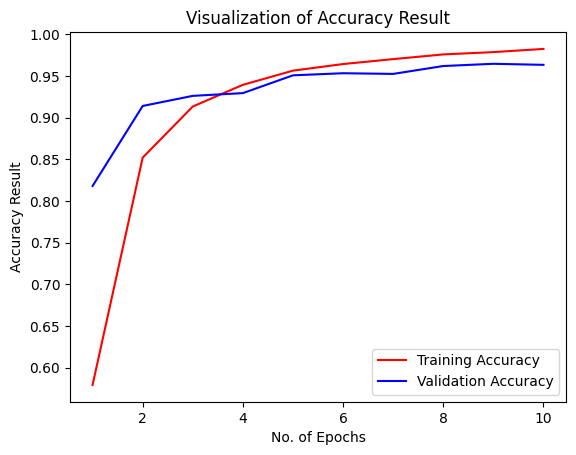

In [36]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [37]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [39]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'/content/plant_disease_dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [40]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step


(array([[9.98338223e-01, 4.20079374e-07, 3.23445484e-08, ...,
         3.74051123e-10, 5.11188704e-12, 4.17262641e-10],
        [9.99995470e-01, 3.51367112e-06, 1.59131144e-08, ...,
         1.74983916e-11, 1.36526086e-11, 3.48157281e-10],
        [1.00000000e+00, 1.44756481e-11, 7.38046083e-12, ...,
         2.63012010e-15, 1.87960486e-15, 3.96956095e-13],
        ...,
        [5.20849553e-12, 2.47797219e-14, 1.61015784e-10, ...,
         4.82516655e-14, 6.97115542e-13, 9.99999881e-01],
        [1.31648639e-13, 6.39737568e-16, 8.25024077e-12, ...,
         7.16120024e-15, 1.49148990e-13, 1.00000000e+00],
        [8.41640788e-17, 2.47403021e-17, 1.34157813e-14, ...,
         1.81113726e-17, 3.60911659e-14, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [41]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [42]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [43]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [44]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

![image.png](attachment:f464cbcc-5d6b-4f32-835c-9aabe0f9c5d4.png)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.97      0.97       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       1.00      0.93      0.96       440
                                   Apple___healthy       0.97      0.94      0.95       502
                               Blueberry___healthy       0.96      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.96      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.99      0.77      0.87       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.84      0.99      0.

In [47]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[488,   1,   0, ...,   0,   0,   0],
       [  1, 488,   0, ...,   0,   0,   0],
       [  2,   0, 410, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 489,   0,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   0, ...,   0,   0, 475]])

### Confusion Matrix Visualization

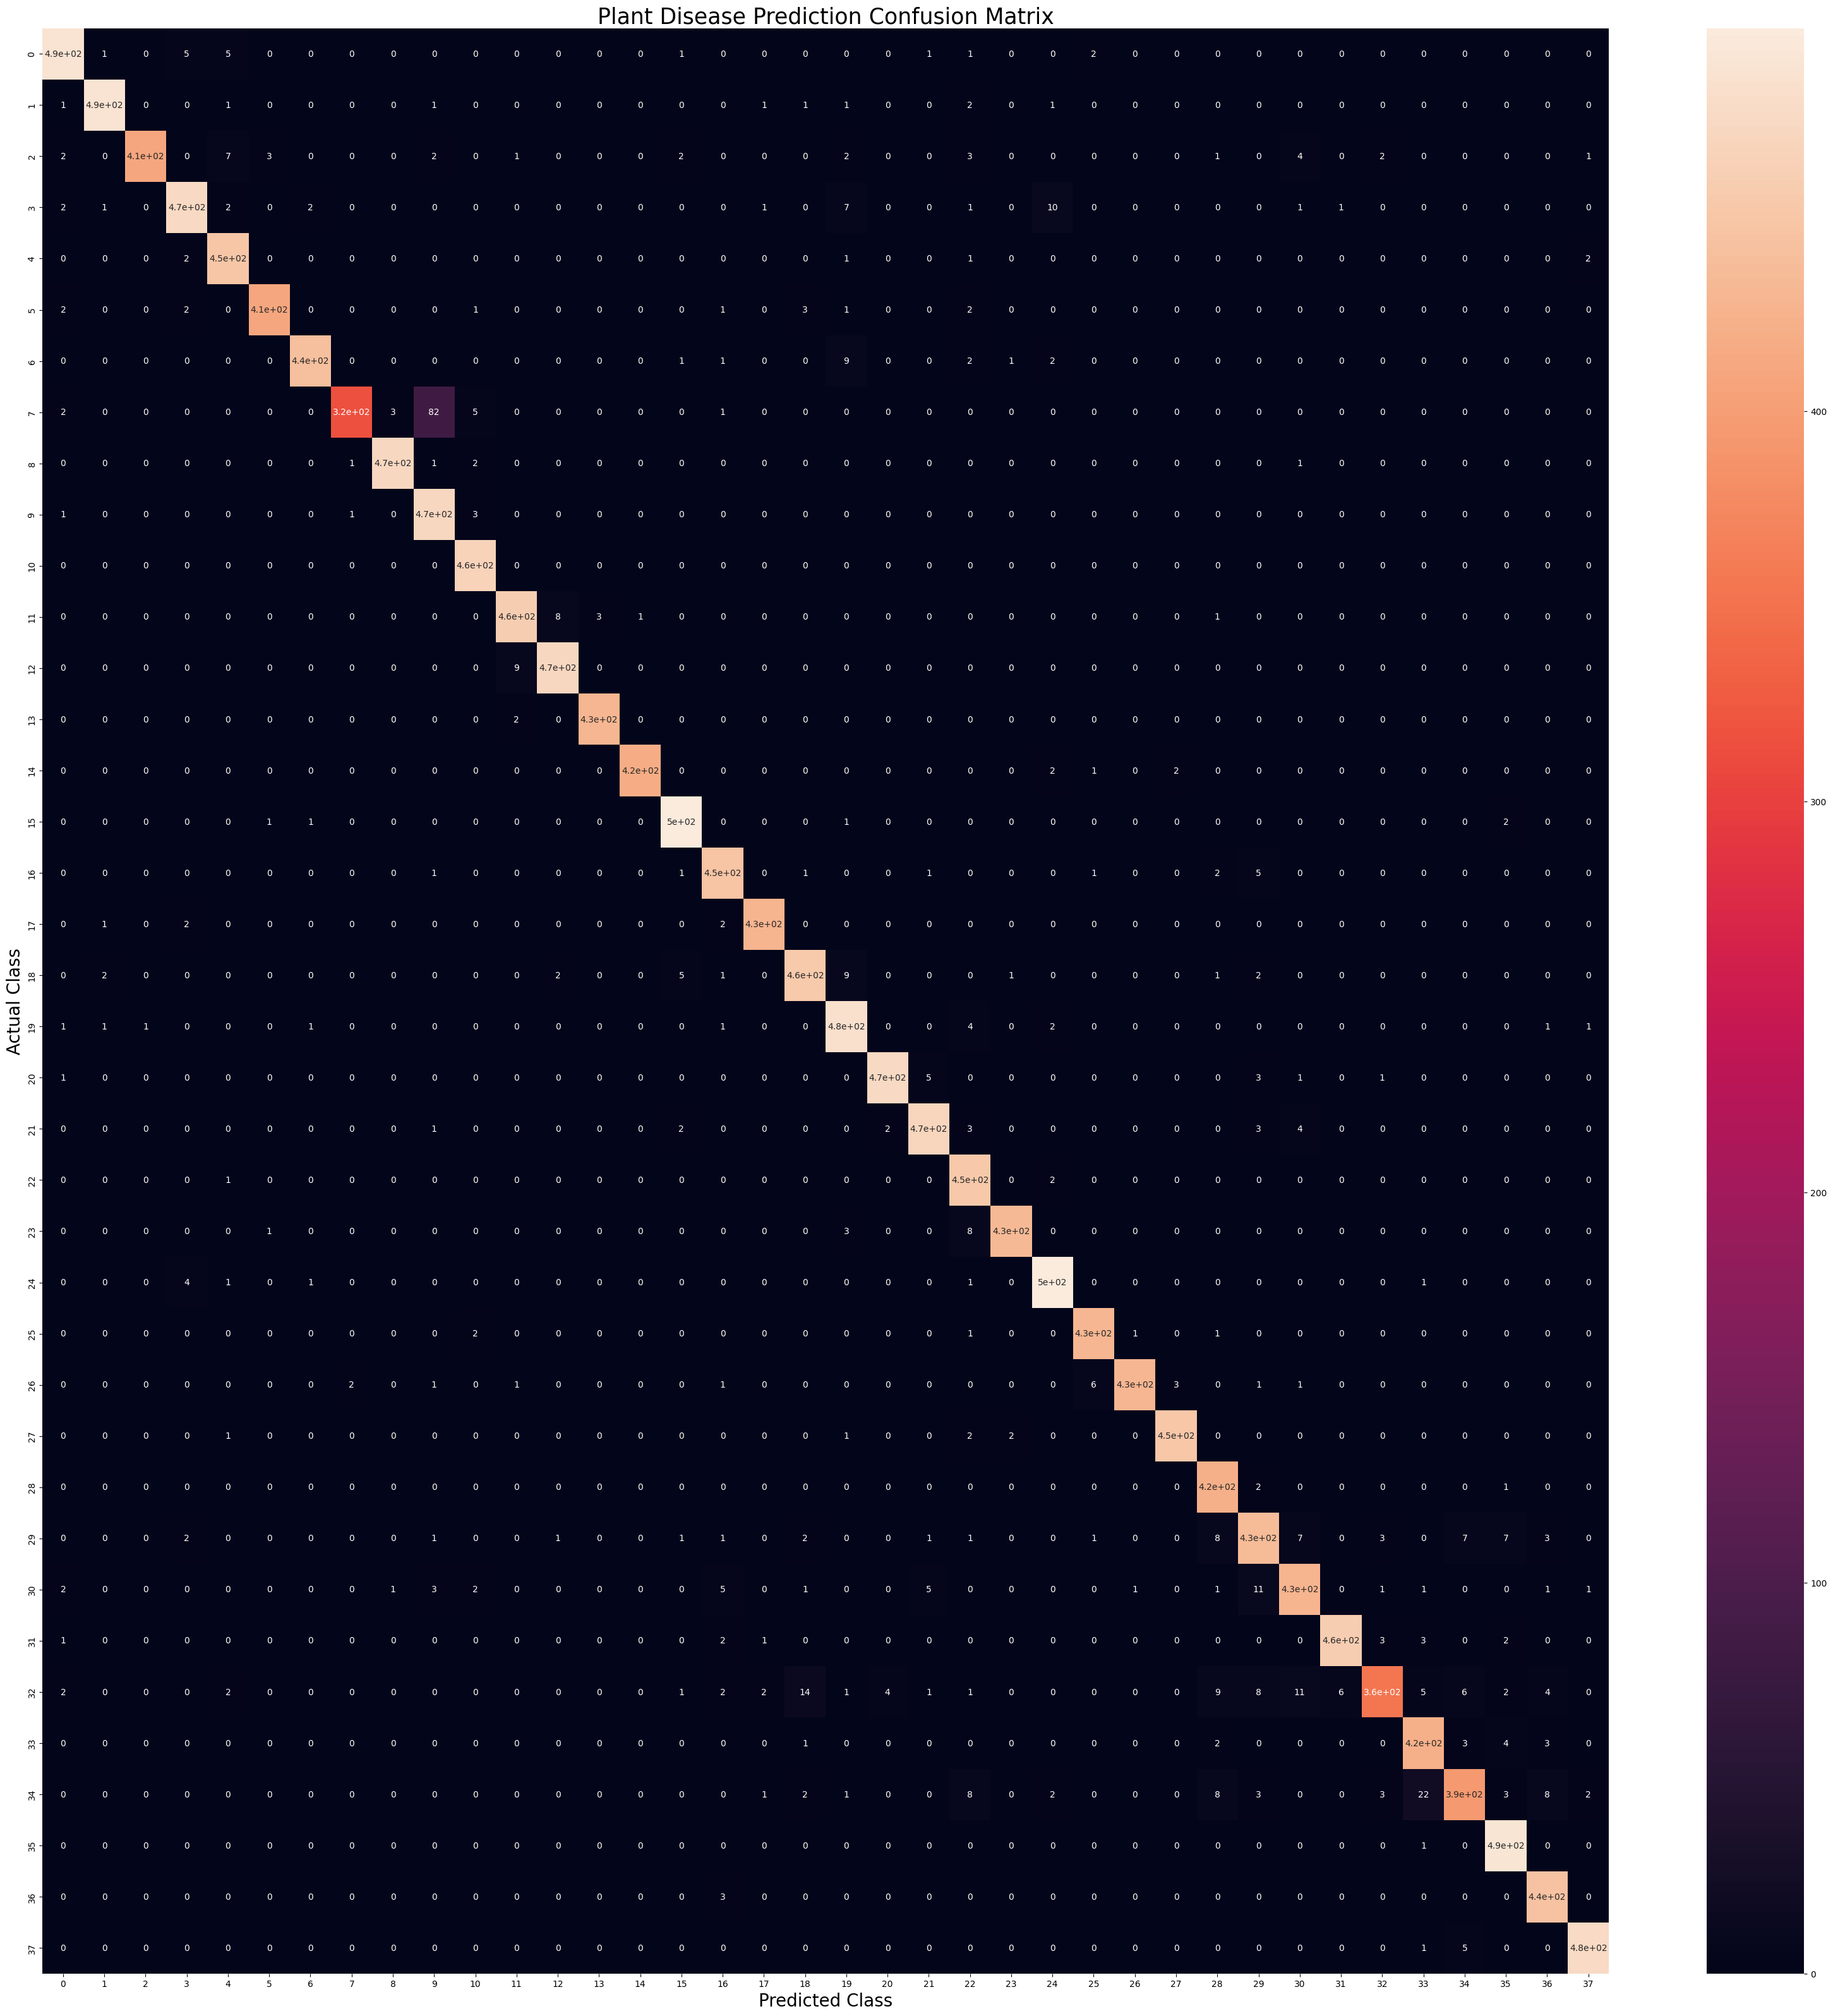

In [48]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()